# Tutorial 3 Data Cleansing
- Feb 26, 2024
## Import Module and Data
· Import Module     
· Import Data
## Cleansing Process
· Paragraph to Sentences    
· Sentences to Words    
· Remove Punctuation    
· Remove Stops Words    
· Lemmatization
## Define Function and Apply
· Define A Function  
· Apply the Function

## Import Modules

In [4]:
# This is already installed by Anaconda
import nltk

In [21]:
# This package has a lot of extensions, which can be installed when needed 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

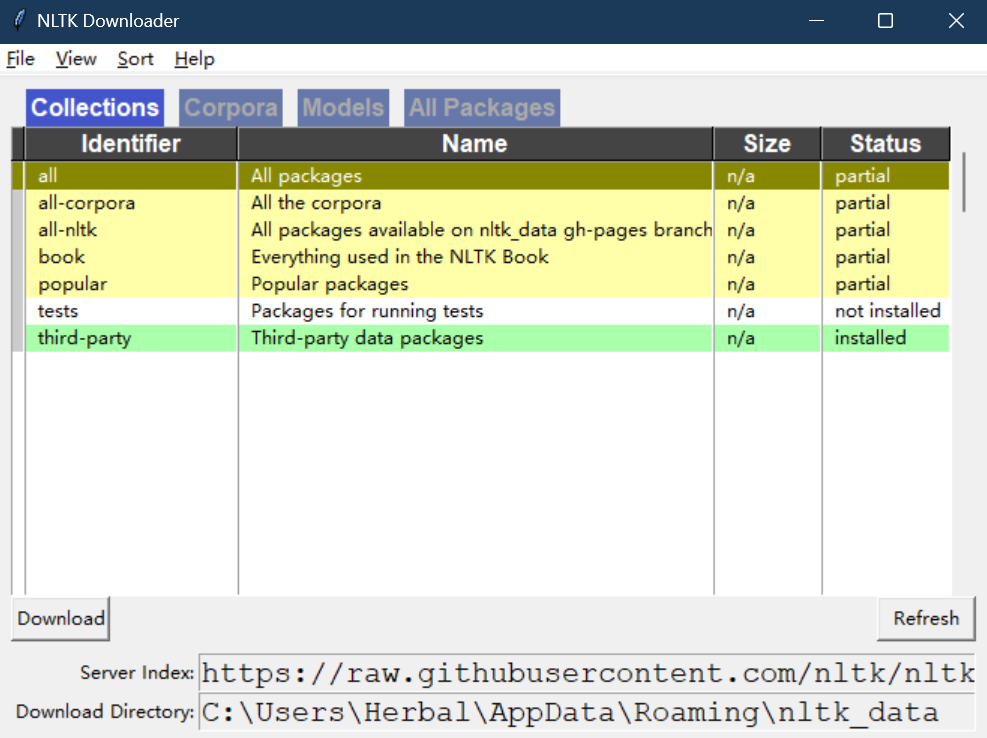

In [22]:
# break paragraph into sentences
from nltk import sent_tokenize

# break sentences into words
from nltk . tokenize import word_tokenize

#for removing punctuation
import string

# useless words that need to be deleted
from nltk.corpus import stopwords

# lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

# get the stem of the words
from nltk.stem.porter import PorterStemmer

## Read excel table with pands
- https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

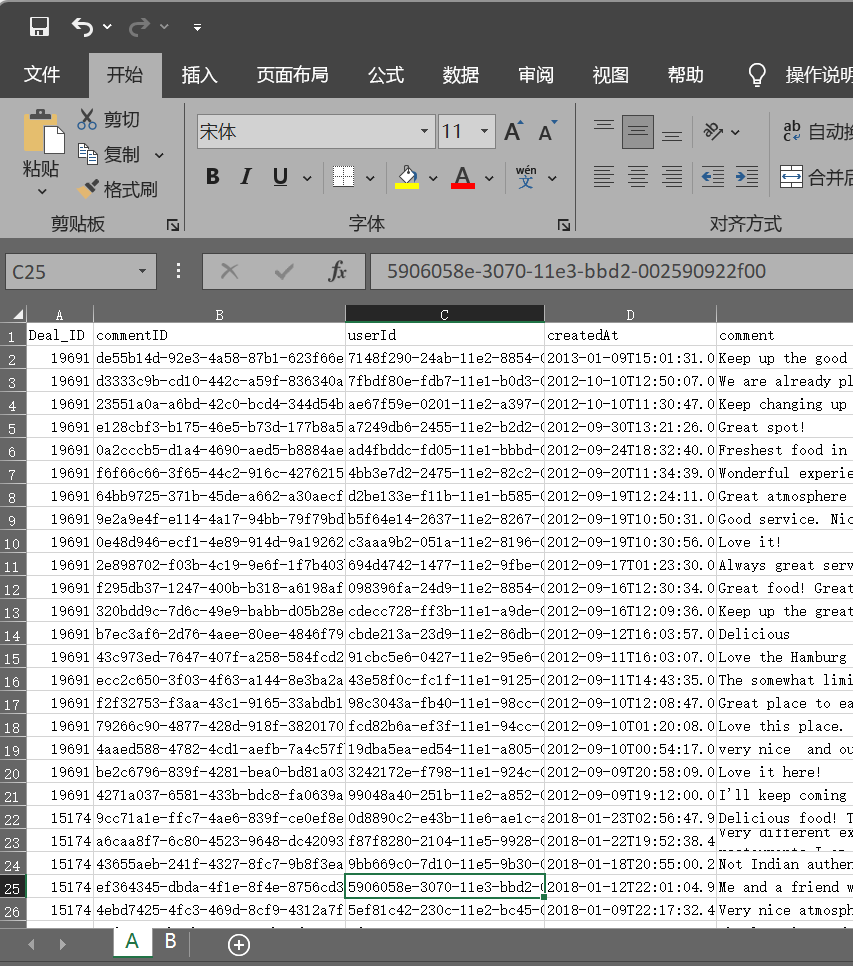

In [30]:
import pandas as pd #pd as alias
text = pd.read_excel('./groupon.xlsx',sheet_name = 'A')
# Use the head() method to preview the top rows of data
text.head(6)

Deal_ID                             commentID  \
0    19691  de55b14d-92e3-4a58-87b1-623f66e3df51   
1    19691  d3333c9b-cd10-442c-a59f-836340a26ac4   
2    19691  23551a0a-a6bd-42c0-bcd4-344d54b9a6cb   
3    19691  e128cbf3-b175-46e5-b73d-177b8a5eb9fc   
4    19691  0a2cccb5-d1a4-4690-aed5-b8884ae02c51   
5    19691  f6f66c66-3f65-44c2-916c-42762151d9a3   

                                 userId                 createdAt  \
0  7148f290-24ab-11e2-8854-00259069d5fe  2013-01-09T15:01:31.000Z   
1  7fbdf80e-fdb7-11e1-b0d3-00259061254e  2012-10-10T12:50:07.000Z   
2  ae67f59e-0201-11e2-a397-0025906127f6  2012-10-10T11:30:47.000Z   
3  a7249db6-2455-11e2-b2d2-00259069d5fe  2012-09-30T13:21:26.000Z   
4  ad4fbddc-fd05-11e1-bbbd-00259060ae36  2012-09-24T18:32:40.000Z   
5  4bb3e7d2-2475-11e2-82c2-00259069d5fe  2012-09-20T11:34:39.000Z   

                                             comment  
0                             Keep up the good work!  
1  We are already planning another lunch at Saul ...  
2  Keep changing up the menu to keep things inter...  
3                                        Great spot!  
4                            Freshest food in town!!  
5               Wonderful experience, great service!

## Data Cleaning

### Paragraph to Sentences
`sent_tokenize`: break paragraph into sentences.

In [31]:
paragraph = "I am good, he is bad! I think he is right.\nThey are bad girls."
print(paragraph)

I am good, he is bad! I think he is right.
They are bad girls.


In [32]:
#Use punkt sentence segmenter.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Herbal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
sentences = sent_tokenize(paragraph)
sentences

['I am good, he is bad!', 'I think he is right.', 'They are bad girls.']

### Sentences to Words

Transfer sentences to lower case , and break sentence into words

In [41]:
words = [ word_tokenize (sentence.lower ()) for sentence in sentences ]
words

[['i', 'am', 'good', ',', 'he', 'is', 'bad', '!'],
 ['i', 'think', 'he', 'is', 'right', '.'],
 ['they', 'are', 'bad', 'girls', '.']]

### Remove Punctuation

Flatten the list

In [42]:
words = sum (words, [])
words

['i',
 'am',
 'good',
 ',',
 'he',
 'is',
 'bad',
 '!',
 'i',
 'think',
 'he',
 'is',
 'right',
 '.',
 'they',
 'are',
 'bad',
 'girls',
 '.']

Create the punctuation list.

In [43]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
punctuation_list = list(string.punctuation)

For each word in the "words" (the list we got before), check whether it is in the “punctuation_list”. If not, reserve it.

In [45]:
words =[ word for word in words if word not in punctuation_list]
words

['i',
 'am',
 'good',
 'he',
 'is',
 'bad',
 'i',
 'think',
 'he',
 'is',
 'right',
 'they',
 'are',
 'bad',
 'girls']

### Remove Stops Words
> Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore.

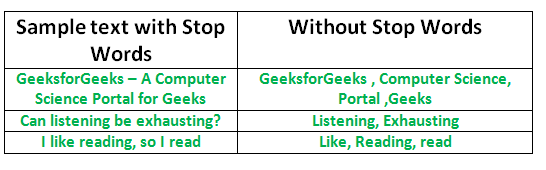

Remove the stop words

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Herbal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
filtered_words = []
for word in  words:
    if word not in stopwords.words ('english'):
        word = word
        filtered_words.append(word)
filtered_words

['good', 'bad', 'think', 'right', 'bad', 'girls']

### Lemmatization

 Lemmatization reduces an inflected word to its root form, if the word does
 actually exists in english vocabulary 

Format：having-have    

link：https://www.bing.com/videos/search?q=lemmatization&&view=detail&mid=7C724883A1E9E945A9587C724883A1E9E945A958&&FORM=VDRVSR

In [48]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Herbal\AppData\Roaming\nltk_data...


True

In [50]:
# lemmatizer = WordNetLemmatizer()
# l_words = [lemmatizer.lemmatize(x) for x in filtered_words]
# l_words

### Define a function

> A function is a block of code which only runs when it is called.

Using a function can help you **customize** and **integrate** the things you want to do to the data

```python
def function_name (argument, parameter, ...):
    statement 1
    statement 2
    result =...
    return result
function_name(your data)
```

In [51]:
def f_clean (paragraph):
    # paragraph to sentences
    sentences = sent_tokenize(paragraph) #use punkt sentence segmenter
    
    # sentences to words; to lower case
    words = [word_tokenize(sentence.lower()) for sentence in sentences] #WordPunct tokenizer
    words = sum(words,[]) #flatten to list (concatenate the list)
    
    # remove the punctuation
    punctuation = list(string.punctuation)
    words = [word for word in words if word not in punctuation]
    
    # remove stop words
    filtered_words = [ word for word in words if word not in stopwords.words ('english')]
    
    # lemmatization or stemming
    lemmatizer = WordNetLemmatizer()
    l_words =[lemmatizer.lemmatize (i) for i in filtered_words]
    
    return(l_words)

### Apply the Function - Structure
Using a apply() can help you use your function to the rows or column of a
data frame

```python
df['new column']= df['..'].apply(function_name)
#df['new column '] is a new column that restore the result of function
```

Before cleasing

In [52]:
text.head()

Deal_ID                             commentID  \
0    19691  de55b14d-92e3-4a58-87b1-623f66e3df51   
1    19691  d3333c9b-cd10-442c-a59f-836340a26ac4   
2    19691  23551a0a-a6bd-42c0-bcd4-344d54b9a6cb   
3    19691  e128cbf3-b175-46e5-b73d-177b8a5eb9fc   
4    19691  0a2cccb5-d1a4-4690-aed5-b8884ae02c51   

                                 userId                 createdAt  \
0  7148f290-24ab-11e2-8854-00259069d5fe  2013-01-09T15:01:31.000Z   
1  7fbdf80e-fdb7-11e1-b0d3-00259061254e  2012-10-10T12:50:07.000Z   
2  ae67f59e-0201-11e2-a397-0025906127f6  2012-10-10T11:30:47.000Z   
3  a7249db6-2455-11e2-b2d2-00259069d5fe  2012-09-30T13:21:26.000Z   
4  ad4fbddc-fd05-11e1-bbbd-00259060ae36  2012-09-24T18:32:40.000Z   

                                             comment  
0                             Keep up the good work!  
1  We are already planning another lunch at Saul ...  
2  Keep changing up the menu to keep things inter...  
3                                        Great spot!  
4                            Freshest food in town!!

After cleasing

In [42]:
text['after_cleansing'] = text ['comment'].apply(f_clean)
text.head()

Deal_ID                             commentID  \
0    19691  de55b14d-92e3-4a58-87b1-623f66e3df51   
1    19691  d3333c9b-cd10-442c-a59f-836340a26ac4   
2    19691  23551a0a-a6bd-42c0-bcd4-344d54b9a6cb   
3    19691  e128cbf3-b175-46e5-b73d-177b8a5eb9fc   
4    19691  0a2cccb5-d1a4-4690-aed5-b8884ae02c51   

                                 userId                 createdAt  \
0  7148f290-24ab-11e2-8854-00259069d5fe  2013-01-09T15:01:31.000Z   
1  7fbdf80e-fdb7-11e1-b0d3-00259061254e  2012-10-10T12:50:07.000Z   
2  ae67f59e-0201-11e2-a397-0025906127f6  2012-10-10T11:30:47.000Z   
3  a7249db6-2455-11e2-b2d2-00259069d5fe  2012-09-30T13:21:26.000Z   
4  ad4fbddc-fd05-11e1-bbbd-00259060ae36  2012-09-24T18:32:40.000Z   

                                             comment  \
0                             Keep up the good work!   
1  We are already planning another lunch at Saul ...   
2  Keep changing up the menu to keep things inter...   
3                                        Great spot!   
4                            Freshest food in town!!   

                                    after_cleansing  
0                                [keep, good, work]  
1   [already, planning, another, lunch, saul, good]  
2  [keep, changing, menu, keep, thing, interesting]  
3                                     [great, spot]  
4                            [freshest, food, town]

Save the cleaned data into a new Excel file named “data_cleansing”

In [43]:
text.to_excel('groupon_cleaned.xlsx', index=False)